# **EDA PROJECT 4:**
# **Mind Matters: Analyzing the Factors Influencing Student Depression**

---



# **About the Project**
* * *
---

This project presents an exploratory data analysis of the "Depression Student Dataset," investigating the complex interplay between mental health and various demographic, academic, and lifestyle factors affecting students.

The dataset, encompassing 502 entries and 11 features, provides a comprehensive basis to examine the influence of factors such as gender, age, academic pressures, study habits, sleep duration, dietary habits, and personal history on student mental well-being.

Through rigorous data cleaning, preparation, and visualization, this analysis explores key distributions and relationships, quantifying the prevalence of depression across diverse student demographics. The insights derived from this project are essential for a deeper understanding of the multifaceted nature of student depression, potentially guiding the development of targeted interventions and support strategies to enhance mental health outcomes within academic settings.

* * *

In [2]:
# Download dataset directly from Kaggle
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download ikynahidwin/depression-student-dataset
! unzip depression-student-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/ikynahidwin/depression-student-dataset
License(s): CC0-1.0
  0% 0.00/4.25k [00:00<?, ?B/s]
100% 4.25k/4.25k [00:00<00:00, 13.3MB/s]
Archive:  depression-student-dataset.zip
  inflating: Depression Student Dataset.csv  


In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the Student depression dataset
student_dep_data = pd.read_csv("/content/Depression Student Dataset.csv")

# **Initial Review of Data**
---
---

In [5]:
# Explore the first five records
student_dep_data.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [6]:
# Explore the last five records
student_dep_data.tail()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
497,Male,26,5.0,2.0,More than 8 hours,Unhealthy,No,8,3,No,Yes
498,Male,24,2.0,1.0,Less than 5 hours,Unhealthy,Yes,8,5,No,Yes
499,Female,23,3.0,5.0,5-6 hours,Healthy,No,1,5,Yes,No
500,Male,33,4.0,4.0,More than 8 hours,Healthy,No,8,1,Yes,No
501,Male,18,5.0,3.0,More than 8 hours,Unhealthy,No,6,2,Yes,Yes


In [7]:
# Find out the total number of rows and columns in the dataset
student_dep_data.shape

(502, 11)

**Observations:**



*  Dataset comprises 502 observations(rows) and 11 features(columns).



In [8]:
# Check the Data types of the features
student_dep_data.dtypes.to_frame("Data Types")

,Data Types
Gender,object
Age,int64
Academic Pressure,float64
Study Satisfaction,float64
Sleep Duration,object
Dietary Habits,object
Have you ever had suicidal thoughts ?,object
Study Hours,int64
Financial Stress,int64
Family History of Mental Illness,object


In [9]:
# Count the occurrence of the data types
student_dep_data.dtypes.value_counts().to_frame("Count")

,Count
object,6
int64,3
float64,2


**Observations:**

*   The dataset contains a mix of data types, with the majority being object types (6 columns), followed by int64 (3 columns) and float64 (2 columns).
*   The presence of object data types suggests that some columns contain categorical or string data that may need to be further inspected and potentially encoded for numerical analysis.

In [10]:
# Check the number of unique values in the categorical columns
categorical_columns = student_dep_data.select_dtypes(include=['object']).columns
student_dep_data[categorical_columns].nunique().to_frame("Count")

,Count
Gender,2
Sleep Duration,4
Dietary Habits,3
Have you ever had suicidal thoughts ?,2
Family History of Mental Illness,2
Depression,2


In [11]:
# Check the unique values in each categoriacal column in the dataset
for column in categorical_columns:
    print(f"Unique values in '{column}':")
    print(student_dep_data[column].unique())
    print("-" * 30)

Unique values in 'Gender':
['Male' 'Female']
------------------------------
Unique values in 'Sleep Duration':
['7-8 hours' '5-6 hours' 'More than 8 hours' 'Less than 5 hours']
------------------------------
Unique values in 'Dietary Habits':
['Moderate' 'Healthy' 'Unhealthy']
------------------------------
Unique values in 'Have you ever had suicidal thoughts ?':
['Yes' 'No']
------------------------------
Unique values in 'Family History of Mental Illness':
['Yes' 'No']
------------------------------
Unique values in 'Depression':
['No' 'Yes']
------------------------------


In [12]:
# Inspect the Column names
student_dep_data.columns

Index(['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

**Observations:**
*   Some column names contain spaces and special characters (e.g., 'Have you ever had suicidal thoughts ?'). This will require cleaning or renaming the columns for easier handling and analysis in python.

In [13]:
# Statistical overview of the dataset
student_dep_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,502.0,26.241036,4.896501,18.0,22.0,26.5,30.0,34.0
Academic Pressure,502.0,3.003984,1.390007,1.0,2.0,3.0,4.0,5.0
Study Satisfaction,502.0,3.075697,1.373490,1.0,2.0,3.0,4.0,5.0
Study Hours,502.0,6.404382,3.742434,0.0,3.0,7.0,10.0,12.0
Financial Stress,502.0,2.928287,1.425053,1.0,2.0,3.0,4.0,5.0


**Observations:**
*   The Age of the students in the dataset ranges from 18 to 34 years, with a mean age of approximately 26.24 years and a standard deviation of about 4.90 years. This suggests a moderate spread in the age of the participants.
*   Variables like Academic_Pressure, Study_Satisfaction, and Financial_Stress are rated on a scale (likely 1-5, based on the min and max values). Their mean values (around 3.00, 3.08, and 2.93 respectively) indicate a distribution around the middle of the scale, suggesting a mix of responses across these factors.
*   Study_Hours shows a wider range (0 to 12 hours) and a relatively larger standard deviation (3.74) compared to its mean (6.40 hours). This indicates a considerable variation in the number of hours students spend studying.

# **Cleaning**
---
---

## **Renaming Columns**

In [14]:
# rename the columns which contain spaces in their names and replace the spaces with underscores
student_dep_data.columns = student_dep_data.columns.str.replace(' ', '_')
student_dep_data.columns = student_dep_data.columns.str.replace('-', '_')

In [15]:
# Check to confirm the changes
student_dep_data.columns

Index(['Gender', 'Age', 'Academic_Pressure', 'Study_Satisfaction',
       'Sleep_Duration', 'Dietary_Habits',
       'Have_you_ever_had_suicidal_thoughts_?', 'Study_Hours',
       'Financial_Stress', 'Family_History_of_Mental_Illness', 'Depression'],
      dtype='object')

**Observation:**

*   The column names have been successfully renamed, replacing spaces and hyphens with underscores.

## **Checking for Missing Values**

In [16]:
# Check for missing values
student_dep_data.isnull().sum().to_frame("Missing Values")

,Missing Values
Gender,0
Age,0
Academic_Pressure,0
Study_Satisfaction,0
Sleep_Duration,0
Dietary_Habits,0
Have_you_ever_had_suicidal_thoughts_?,0
Study_Hours,0
Financial_Stress,0
Family_History_of_Mental_Illness,0


**Observation:**
* There are no missing numbers in the dataset.

## **Checking for Duplicates**

In [17]:
# Check for duplicates
student_dep_data.duplicated().sum()

np.int64(0)

**Observations:**
*  There are no duplicates in the dataset.

# **Exploratory Data Analysis**
---
---

## **Statistical Analysis: Graphical Rep.**

### **QUESTION 1: What is the distribution of depression status in the student population?**

Distribution of Depression Status:
Depression
Yes    252
No     250
Name: count, dtype: int64


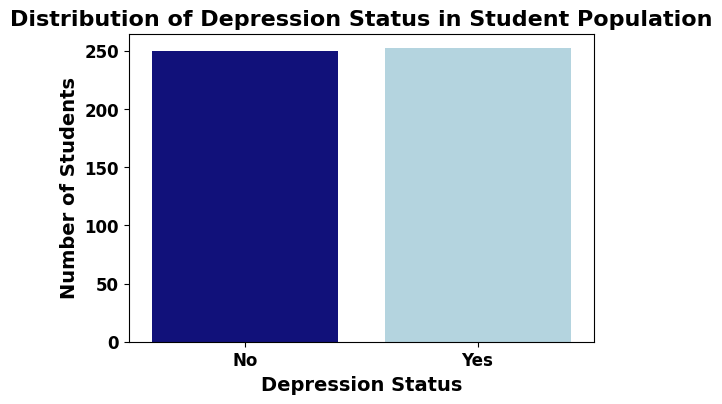

In [18]:
# Calculate the distribution of depression status
depression_counts = student_dep_data['Depression'].value_counts()

# Display the counts
print("Distribution of Depression Status:")
print(depression_counts)

# Create a count plot to visualize the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Depression', data=student_dep_data, palette=['darkblue', 'lightblue'])
plt.title('Distribution of Depression Status in Student Population', weight='bold', fontsize=16)
plt.xlabel('Depression Status', weight='bold', fontsize=14)
plt.ylabel('Number of Students', weight='bold', fontsize=14)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.show()

**Observations:**

*   The distribution of depression status in the student population is nearly balanced, with 252 students reporting having depression ('Yes') and 250 students reporting not having depression ('No').
*   This relatively even split suggests that depression is a significant concern within this student population, affecting close to half of the surveyed individuals.

### **QUESTION 2: How does the prevalence of depression differ between male and female students?**

Prevalence of Depression by Gender:
Depression   No  Yes
Gender              
Female      121  114
Male        129  138


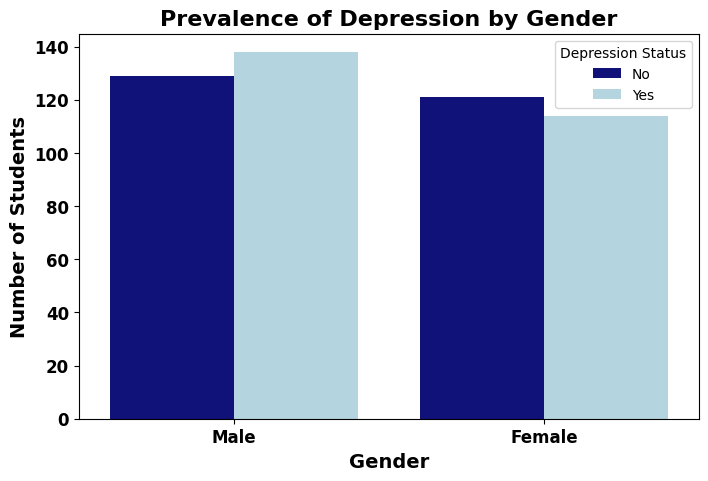

In [19]:
# Calculate the counts of depression status by gender
gender_depression_counts = student_dep_data.groupby('Gender')['Depression'].value_counts().unstack()

# Display the counts
print("Prevalence of Depression by Gender:")
print(gender_depression_counts)

# Create a grouped count plot to visualize the distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='Depression', data=student_dep_data, palette=['darkblue', 'lightblue'])
plt.title('Prevalence of Depression by Gender', weight='bold', fontsize=16)
plt.xlabel('Gender', weight='bold', fontsize=14)
plt.ylabel('Number of Students', weight='bold', fontsize=14)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.legend(title='Depression Status')
plt.show()

**Observations:**

*   Both male and female students in the dataset report experiencing depression. Specifically, 138 male students and 114 female students reported having depression.
*   While the counts are relatively close, a slightly higher number of male students reported having depression compared to female students in this dataset. Further analysis could explore if this difference is statistically significant or if there are other factors contributing to this distribution.

### **QUESTION 3: What is the typical sleep duration among students, and how does it relate to depression?**

Prevalence of Depression by Sleep Duration:
Depression         No  Yes
Sleep_Duration            
5-6 hours          59   64
7-8 hours          61   67
Less than 5 hours  59   64
More than 8 hours  71   57


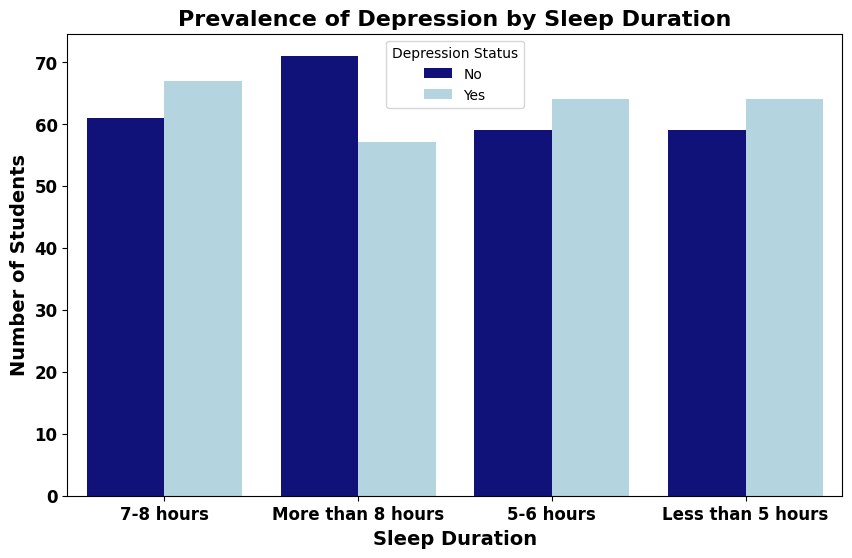

In [20]:
# Calculate the counts of depression status by sleep duration
sleep_depression_counts = student_dep_data.groupby('Sleep_Duration')['Depression'].value_counts().unstack()

# Display the counts
print("Prevalence of Depression by Sleep Duration:")
print(sleep_depression_counts)

# Create a grouped count plot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sleep_Duration', hue='Depression', data=student_dep_data, palette=['darkblue', 'lightblue'], order=student_dep_data['Sleep_Duration'].value_counts().index)
plt.title('Prevalence of Depression by Sleep Duration', weight='bold', fontsize=16)
plt.xlabel('Sleep Duration', weight='bold', fontsize=14)
plt.ylabel('Number of Students', weight='bold', fontsize=14)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.legend(title='Depression Status')
plt.show()

**Observations:**

*   Students who reported sleeping "Less than 5 hours," "5-6 hours," and "7-8 hours" all show a higher number of students with depression compared to those without depression in those categories.
*   Conversely, students who reported sleeping "More than 8 hours" show a higher number of students without depression compared to those with depression in this category.
*   This suggests a potential association between sleep duration and depression status, where shorter sleep durations might be associated with a higher prevalence of depression, and longer sleep durations (more than 8 hours) might be associated with a lower prevalence.

### **QUESTION 4: Do dietary habits have an association with depression status?**

Prevalence of Depression by Dietary Habits:
Depression      No  Yes
Dietary_Habits         
Healthy         97   64
Moderate        90   82
Unhealthy       63  106


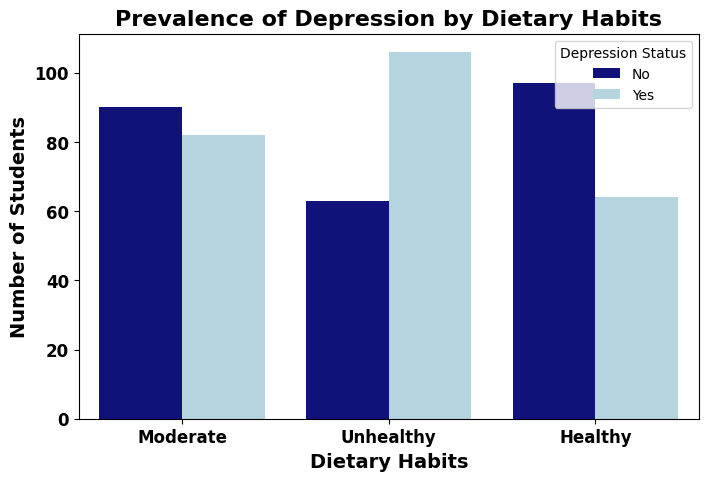

In [21]:
# Calculate the counts of depression status by dietary habits
dietary_depression_counts = student_dep_data.groupby('Dietary_Habits')['Depression'].value_counts().unstack()

# Display the counts
print("Prevalence of Depression by Dietary Habits:")
print(dietary_depression_counts)

# Create a grouped count plot to visualize the distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Dietary_Habits', hue='Depression', data=student_dep_data, palette=['darkblue', 'lightblue'], order=student_dep_data['Dietary_Habits'].value_counts().index)
plt.title('Prevalence of Depression by Dietary Habits', weight='bold', fontsize=16)
plt.xlabel('Dietary Habits', weight='bold', fontsize=14)
plt.ylabel('Number of Students', weight='bold', fontsize=14)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.legend(title='Depression Status')
plt.show()

**Observations:**

*   Students with 'Unhealthy' dietary habits show a considerably higher number of students with depression (106) compared to those without depression (63) within that category.
*   Students with 'Healthy' dietary habits have a higher number of students without depression (97) compared to those with depression (64).
*   Students with 'Moderate' dietary habits have a relatively closer distribution, with slightly more students without depression (90) than with depression (82). This suggests a potential association where unhealthy dietary habits might be linked to a higher prevalence of depression, while healthy habits might be linked to a lower prevalence.

### **QUESTION 5: How does a family history of mental illness influence the likelihood of depression in students?**

Prevalence of Depression by Family History of Mental Illness:
Depression                         No  Yes
Family_History_of_Mental_Illness          
No                                139  126
Yes                               111  126


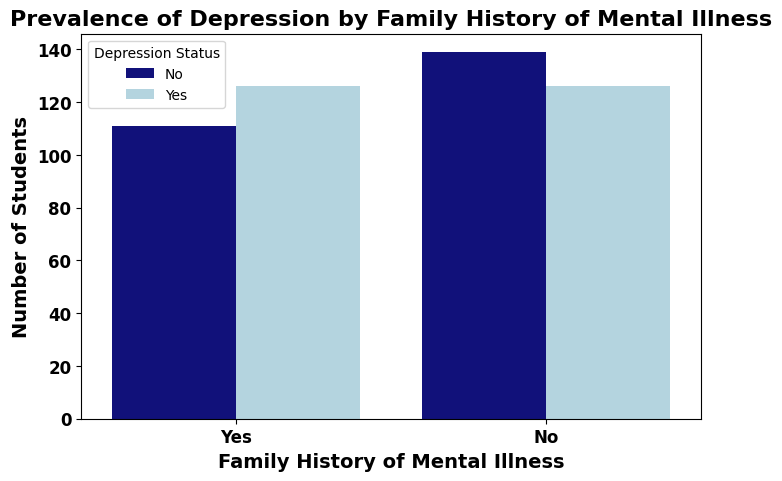

In [22]:
# Calculate the counts of depression status by family history of mental illness
family_history_depression_counts = student_dep_data.groupby('Family_History_of_Mental_Illness')['Depression'].value_counts().unstack()

# Display the counts
print("Prevalence of Depression by Family History of Mental Illness:")
print(family_history_depression_counts)

# Create a grouped count plot to visualize the distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Family_History_of_Mental_Illness', hue='Depression', data=student_dep_data, palette=['darkblue', 'lightblue'])
plt.title('Prevalence of Depression by Family History of Mental Illness', weight='bold', fontsize=16)
plt.xlabel('Family History of Mental Illness', weight='bold', fontsize=14)
plt.ylabel('Number of Students', weight='bold', fontsize=14)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.legend(title='Depression Status')
plt.show()

**Observations:**

*   Among students with a family history of mental illness, there are equal numbers of students with and without depression (126 each).
*   Among students without a family history of mental illness, there are slightly more students without depression (139) compared to those with depression (126). This suggests that while a family history might be a factor, it doesn't appear to be a strong predictor of depression in this dataset compared to other factors like dietary habits or sleep duration.

### **QUESTION 6: Are students who have had suicidal thoughts more likely to be diagnosed with depression?**

Prevalence of Depression by Suicidal Thoughts:
Depression                              No  Yes
Have_you_ever_had_suicidal_thoughts_?          
No                                     179   63
Yes                                     71  189


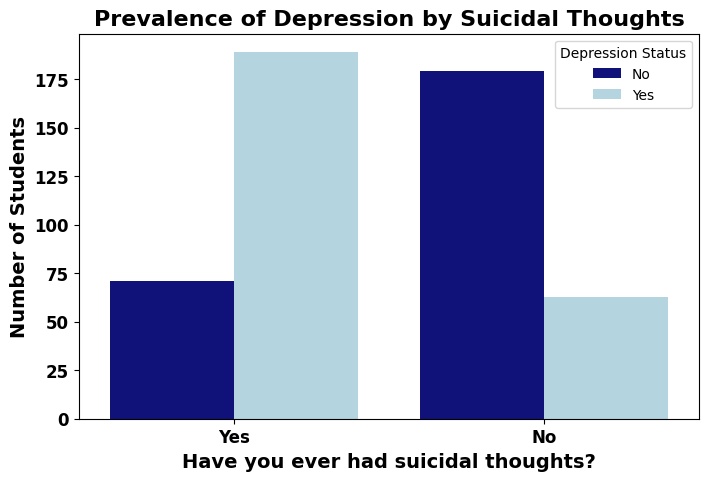

In [23]:
# Calculate the counts of depression status by suicidal thoughts
suicidal_thoughts_depression_counts = student_dep_data.groupby('Have_you_ever_had_suicidal_thoughts_?')['Depression'].value_counts().unstack()

# Display the counts
print("Prevalence of Depression by Suicidal Thoughts:")
print(suicidal_thoughts_depression_counts)

# Create a grouped count plot to visualize the distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Have_you_ever_had_suicidal_thoughts_?', hue='Depression', data=student_dep_data, palette=['darkblue', 'lightblue'])
plt.title('Prevalence of Depression by Suicidal Thoughts', weight='bold', fontsize=16)
plt.xlabel('Have you ever had suicidal thoughts?', weight='bold', fontsize=14)
plt.ylabel('Number of Students', weight='bold', fontsize=14)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.legend(title='Depression Status')
plt.show()

**Observations:**

*   A significantly higher number of students who reported having suicidal thoughts also reported having depression (189) compared to those who reported having suicidal thoughts but not depression (71).
*   Conversely, among students who reported never having suicidal thoughts, a much higher number reported not having depression (179) compared to those who reported not having suicidal thoughts but having depression (63).
*   This strong contrast suggests a significant association between having suicidal thoughts and being diagnosed with depression in this dataset.

### **QUESTION 7: Is there a relationship between age and academic pressure among students?**

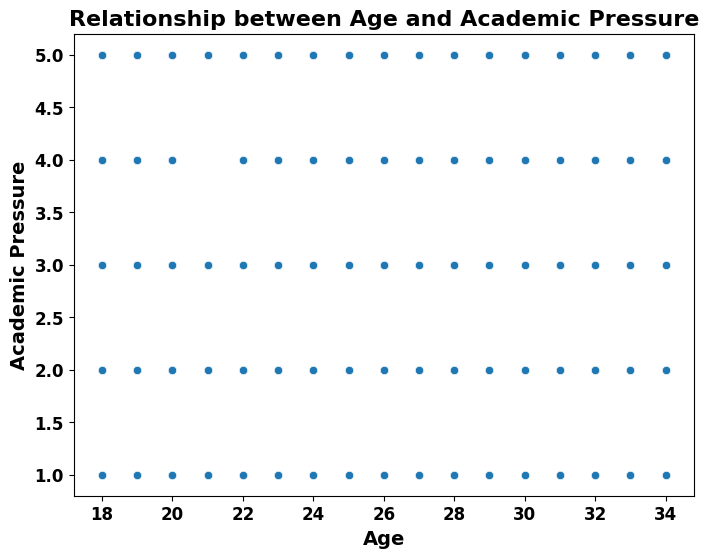

In [24]:
# Create a scatter plot to visualize the relationship between Age and Academic Pressure
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Academic_Pressure', data=student_dep_data)
plt.title('Relationship between Age and Academic Pressure', weight='bold', fontsize=16)
plt.xlabel('Age', weight='bold', fontsize=14)
plt.ylabel('Academic Pressure', weight='bold', fontsize=14)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.show()

**Observations:**

*   The scatter plot shows a wide dispersion of data points, indicating no clear linear relationship between age and academic pressure. Students of various ages report a range of academic pressure levels.
*   There doesn't appear to be a discernible trend where older students consistently report higher or lower academic pressure than younger students, or vice versa. This suggests that age, within the range of this dataset, may not be a primary predictor of academic pressure levels.

### **QUESTION 8: How does study satisfaction vary with the number of study hours?**

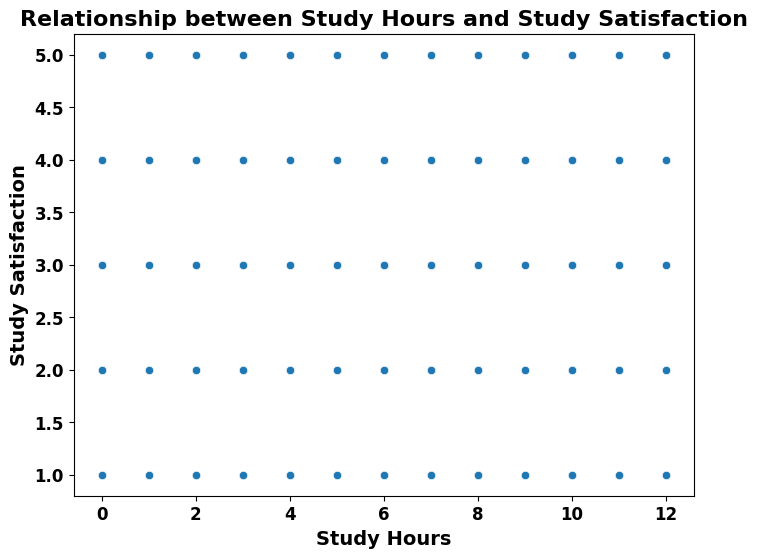

In [25]:
# Create a scatter plot to visualize the relationship between Study Hours and Study Satisfaction
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Study_Hours', y='Study_Satisfaction', data=student_dep_data)
plt.title('Relationship between Study Hours and Study Satisfaction', weight='bold', fontsize=16)
plt.xlabel('Study Hours', weight='bold', fontsize=14)
plt.ylabel('Study Satisfaction', weight='bold', fontsize=14)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.show()

**Observations:**

*   The scatter plot does not reveal a strong linear relationship between the number of study hours and study satisfaction. Students who study for similar amounts of time report a wide range of satisfaction levels.
*   There isn't a clear trend suggesting that studying more hours consistently leads to higher or lower study satisfaction. Other factors likely play a significant role in determining a student's satisfaction with their studies.

### **QUESTION 9: Is there a correlation between financial stress and academic pressure?**

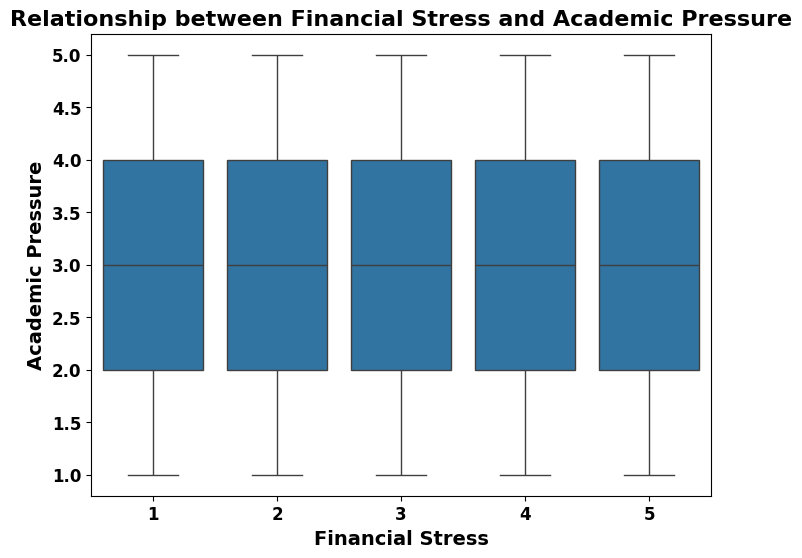

In [26]:
# Create a box plot to visualize the relationship between Financial Stress and Academic Pressure
plt.figure(figsize=(8, 6))
sns.boxplot(x='Financial_Stress', y='Academic_Pressure', data=student_dep_data)
plt.title('Relationship between Financial Stress and Academic Pressure', weight='bold', fontsize=16)
plt.xlabel('Financial Stress', weight='bold', fontsize=14)
plt.ylabel('Academic Pressure', weight='bold', fontsize=14)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.show()

**Observations on the Relationship between Financial Stress and Academic Pressure:**

*   The box plot shows that as financial stress increases, there appears to be a slight upward trend in the median academic pressure reported by students.
*   While there is an observable trend, the boxes for each level of financial stress overlap considerably, and the spread of academic pressure within each level is quite wide, suggesting that financial stress is not the sole determinant of academic pressure and other factors are also at play.

### **QUESTION 10: Is there a relationship between academic pressure, study satisfaction, and financial stress, and how do these factors collectively relate to depression?**

Mean Academic Pressure, Study Satisfaction, and Financial Stress by Depression Status:


,Academic_Pressure,Study_Satisfaction,Financial_Stress
Depression,,,
No,2.340000,3.480000,2.504000
Yes,3.662698,2.674603,3.349206


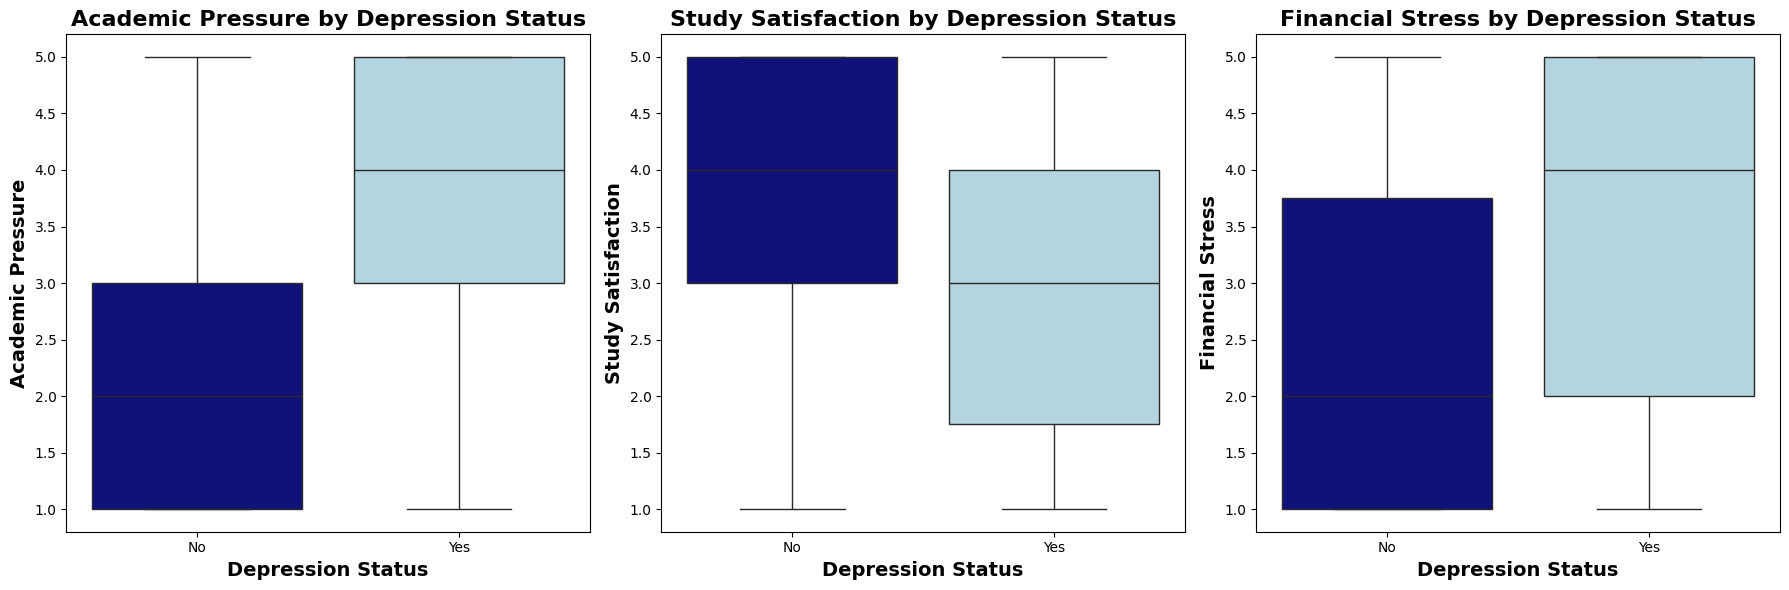

In [27]:
# Group data by Depression status and calculate the mean of Academic Pressure, Study Satisfaction, and Financial Stress
grouped_data = student_dep_data.groupby('Depression')[['Academic_Pressure', 'Study_Satisfaction', 'Financial_Stress']].mean()

# Display the grouped data
print("Mean Academic Pressure, Study Satisfaction, and Financial Stress by Depression Status:")
display(grouped_data)

# We can also visualize the distribution of these factors for students with and without depression
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='Depression', y='Academic_Pressure', data=student_dep_data, palette=['darkblue', 'lightblue'], ax=axes[0])
axes[0].set_title('Academic Pressure by Depression Status', weight='bold', fontsize=16)
axes[0].set_xlabel('Depression Status', weight='bold', fontsize=14)
axes[0].set_ylabel('Academic Pressure', weight='bold', fontsize=14)


sns.boxplot(x='Depression', y='Study_Satisfaction', data=student_dep_data, palette=['darkblue', 'lightblue'], ax=axes[1])
axes[1].set_title('Study Satisfaction by Depression Status', weight='bold', fontsize=16)
axes[1].set_xlabel('Depression Status', weight='bold', fontsize=14)
axes[1].set_ylabel('Study Satisfaction', weight='bold', fontsize=14)


sns.boxplot(x='Depression', y='Financial_Stress', data=student_dep_data, palette=['darkblue', 'lightblue'], ax=axes[2])
axes[2].set_title('Financial Stress by Depression Status', weight='bold', fontsize=16)
axes[2].set_xlabel('Depression Status', weight='bold', fontsize=14)
axes[2].set_ylabel('Financial Stress', weight='bold', fontsize=14)

plt.tight_layout()
plt.show()

**Observations:**
*   Students who reported having depression show higher mean scores for Academic_Pressure and Financial_Stress compared to students without depression.
*   Conversely, students who reported having depression show a lower mean score for Study_Satisfaction compared to students without depression. This suggests that higher academic pressure and financial stress, coupled with lower study satisfaction, may be associated with a higher likelihood of depression in this dataset.

# **Key Findings and Implications**
* * *
---
Based on the exploratory data analysis of the Student Depression Dataset, the following key findings and implications can be highlighted:

**1. Prevalence of Depression:**
*   The student population in this dataset exhibits a nearly balanced distribution of depression status, with a significant number of students reporting having depression.
*   **Implication:** This highlights that depression is a prevalent concern within this student group, necessitating attention and support strategies.

**2. Gender and Depression:**
*   While both male and female students report depression, a slightly higher number of male students reported having depression in this dataset.
*   **Implication:** Further investigation may be needed to understand the factors contributing to this difference and to tailor interventions appropriately for each gender.

**3. Sleep Duration and Depression:**
*   There appears to be a potential association between shorter sleep durations ('Less than 5 hours', '5-6 hours', '7-8 hours') and a higher prevalence of depression. Conversely, longer sleep duration ('More than 8 hours') seems associated with a lower prevalence.
*   **Implication:** Promoting healthy sleep habits and providing resources for students struggling with sleep could be crucial in mitigating depression risk.

**4. Dietary Habits and Depression:**
*   Students with 'Unhealthy' dietary habits show a considerably higher number of students with depression, while 'Healthy' dietary habits are associated with a lower prevalence.
*   **Implication:** Encouraging and supporting healthy eating habits among students could be a valuable component of mental well-being initiatives.

**5. Family History of Mental Illness and Depression:**
*   While a family history of mental illness might play a role, it did not appear to be as strong a predictor of depression in this dataset compared to factors like diet or sleep duration.
*   **Implication:** While family history is a consideration, focusing on modifiable lifestyle factors might be more impactful for broad intervention strategies in this population.

**6. Suicidal Thoughts and Depression:**
*   There is a strong association between having suicidal thoughts and being diagnosed with depression.
*   **Implication:** This finding underscores the critical need for mental health support systems to include screening for suicidal ideation and providing immediate, accessible resources for students who report such thoughts.

**7. Age, Academic Pressure, Study Satisfaction, and Financial Stress:**
*   No clear linear relationship was observed between age and academic pressure or between study hours and study satisfaction.
*   Academic pressure and financial stress appear to have a slight upward trend with increasing financial stress, and students with depression reported higher mean academic pressure and financial stress, and lower mean study satisfaction.
*   **Implication:** These factors are complex and interconnected, and interventions should consider the cumulative impact of academic demands, financial burdens, and study experiences on student mental health.

* * *